# Project 1 Starter

**Here are some tips for submitting your project. You can use the points as partial check list before submission.**

- **Give your notebook a clear and descriptive title.** 
- **Explain your work in Markdown cells.** This will make your notebook easier to read and understand. You can use different colors of font to highlight important points.
- **Remove any unnecessary code or text.** For example, you should not include the template for training and scoring in your final submission.
- **Package your submission in a single file.** I will deduct points for multiple files or incorrect folder structure.
- **Name your notebooks correctly.** Include your name and Net-ID in the file name.
- **Train your TE/WOE encoders on the training set only.** You can train them on the full dataset for your final model.
- **Test your scoring function.** Most students scoring functions in the past din't work, so make sure to test yours before submitting your project.
- **Avoid common mistakes in your scoring function.** For example, your scoring function should not:
  - drop records, expect the target to be passed
  - fit TE/WOE/Scalers
  - return anything other than a Pandas DF.
- **Make sure you have the required number of engineered features.** 
- **Don't create features and then not use them in the model**, if there is a reason not to use the feature in the model, explain.
- **Don't include models in your notebook that you didn't train.** This is considered cheating and will result in a grade of zero for the project.
- **Consistently display model performance metrics.** Use AUC or AUCPR for all models and iterations, and don't switch between metrics. For sure don't use accuracy, it is misleading metric for the imbalanced datasets. 
- **Discuss your model results in a Markdown cell.** Don't just print the results; explain what they mean.
- **Include a conclusion section in your notebook.** This is your chance to summarize your findings and discuss the implications of your work.
- **Treat your notebook like a project report that will be read by your manager who can't read Python code.** Make sure your notebook is clear, concise, and easy to understand.
- **Display a preview of your dataset that you used for training.** This will help me understand what features you used in your model.
- **Use the libraries versions specified on eLearning.** For example, you should use H2O 3.42.0.2  
- **Use Python 3.10.11.** If you use another version and your code doesn't work on 3.10.11, it will be considered a bug in your code.
- **When running H2O and want to suppress long prints (for example model summary), include ";" at the end of the command.**
- **Don't include the dataset with your deliverables.** 

## Project Requirements Summary

**This is draft - version 0 - changes are possible and will be announced.**

Project 1 is to allow students to practice Data Science concepts learned so far.

The project will include following tasks:
- Load dataset. Don't use "index" column for training.
- Clean up the data:
    - Encode/replace missing values
    - Replace features values that appear incorrect
- Encode categorical variables
- Split dataset to Train/Validation/Test
- Add engineered features
- Train and tune ML model
- Provide final metrics using Test dataset
- Provide a scoring function that can be used to score new data. You can test your scoring function on the provided "scoring" dataset.

**Don't use PCA or TruncatedSVD for this project.** The goal of using Linear models is to be able to interpret the results via coefficients, and PCA/TruncatedSVD will make use of coefficients unusable for interpretation.

### Types of models to train

Your final submission should include single model. 
The model set you should try to come up with best model per type of model:
1. Identify best model from: Sklearn Logistic Regression - try all combinations of regularization
2. Identify best model from: H2O-3 GLM - try different combinations of regularization

**Evaluation metric: AUCPR**

### Feature engineering

You should train/fit categorical features scalers and encoders on Train only. Use `transform` or equivalent function on Validation/Test datasets.

It is important to understand all the steps before model training, so that you can reliably replicate and test them to produce scoring function.


You should generate various new features. Examples of such features can be seen in the Module-3 lecture on GLMs.  
Your final model should have at least **10** new engineered features.   
On-hot-encoding, label encoding, and target encoding **is not included in the** **10** features to create.    
You can attempt target encoding, however the technique is not expected to produce improvement for Linear models.

Ideas for Feature engineering for various types of variables:
1. https://docs.h2o.ai/driverless-ai/1-10-lts/docs/userguide/transformations.html
2. GLM lecture and hands-on (Module-3)


**Note**: 
- You don't have to perform feature engineering using H2O-3 even if you decided to use H2O-3 GLM for model training.
- It is OK to perform feature engineering using any technique, as long as you can replicate it correctly in the Scoring function.

### Threshold calculation

You will need to calculate optimal threshold for class assignment using F1 metric:
- If using sklearn, use F1 `macro`: `f1_score(y_true, y_pred, average='macro')` 
- If using H2O-3, use F1

You will need to find optimal probability threshold for class assignment, the threshold that maximizes above F1.

### Scoring function

The Project-1 will be graded based on the completeness and performance of your final model against the hold-out dataset.
The hold-out dataset will not be known to the students. As part of your deliverables, you will need to submit a scoring function. 

You need to submit a scoring function for the best model you trained, either Sklearn or H2O-3 model.  

The scoring function will perform the following:
- Accept dataset in the same format as provided with the project, minus "MIS_Status" column
- Load trained model and any encoders/scalers that are needed to transform data
- Transform dataset into format that can be scored with the trained model
- Score the dataset and return the results, for each record
    - Record ID
    - Record label as determined by final model (0 or 1)
    - If your model returns probabilities, you need to assign the label based on maximum F1 threshold
    
Scoring function header:
```
def project_1_scoring(data):
    """
    Function to score input dataset.
    
    Input: dataset in Pandas DataFrame format
    Output: Python list of labels in the same order as input records
    
    Flow:
        - Load artifacts
        - Transform dataset
        - Score dataset
        - Return labels
    
    """
    l = data.shape[0]
    return l*[0]
```

Look for full example of scoring function at the bottom of the notebook. **Don't copy as is - this is just an example**

### Deliverables in a single zip file in the following structure:
- `notebook` (folder)
    - Jupyter notebook with complete code to manipulate data, train and tune final model. `ipynb` format.
    - Jupyter notebook with scoring function. `ipynb` format.
- `artifacts` (folder)
    - Model and any potential encoders in the "pkl" format or native H2O-3 format (for H2O-3 model)
    - Scoring function that will load the final model and encoders. Separate from above notebook or `.py` file



Your notebook should include explanations about your code and be designed to be easily followed and results replicated. Once you are done with the final version, you will need to test it by running all cells from top to bottom after restarting Kernel. It can be done by running `Kernel -> Restart & Run All`


**Important**: To speed up progress, first produce working code using a small subset of the dataset.

## Additional Details

### Dataset description

The dataset is from the U.S. Small Business Administration (SBA) The U.S. SBA was founded in 1953 on the principle of promoting and assisting small enterprises in the U.S. credit market (SBA Overview and History, US Small Business Administration (2015)). Small businesses have been a primary source of job creation in the United States; therefore, fostering small business formation and growth has social benefits by creating job opportunities and reducing unemployment. There have been many success stories of start-ups receiving SBA loan guarantees such as FedEx and Apple Computer. However, there have also been stories of small businesses and/or start-ups that have defaulted on their SBA-guaranteed loans.    


More info on the original dataset: https://www.kaggle.com/mirbektoktogaraev/should-this-loan-be-approved-or-denied

**Don't use original dataset, use only dataset provided with project requirements in eLearning**

### Dataset preparation and clean-up

Modify and clean-up the dataset as following:
- Replace encode Na/Null values
- Convert the strings to floats/integers as needed

Any additional clean-up as you find fit.

In [1]:
import h2o
try:
    h2o.cluster().shutdown()
except:
    pass 

In [2]:
import h2o
from h2o.frame import H2OFrame

# Initialize the H2O cluster
h2o.init(max_mem_size="16g", nthreads=-1)

input_csv = "D:/Work/Gre/UTD/Courses/Fall/MIS6341/Softwares/Python/ml-fall-2023/Project1/SBA_loans_project_1.csv"
data = h2o.import_file(input_csv)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.361-b09, mixed mode)
  Starting server from D:\Work\Gre\UTD\Courses\Fall\MIS6341\Softwares\Python\ml-fall-2023\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Asus\AppData\Local\Temp\tmp_g6v6eoj
  JVM stdout: C:\Users\Asus\AppData\Local\Temp\tmp_g6v6eoj\h2o_Asus_started_from_python.out
  JVM stderr: C:\Users\Asus\AppData\Local\Temp\tmp_g6v6eoj\h2o_Asus_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,06 secs
H2O_cluster_timezone:,America/Chicago
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.3
H2O_cluster_version_age:,2 months
H2O_cluster_name:,H2O_from_python_Asus_sqyxgy
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,14.22 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [3]:
data

index,City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status
0,GLEN BURNIE,MD,21060,"BUSINESS FINANCE GROUP, INC.",VA,811111,7,1,6,7,1,1,0,N,743000,0,743000,743000,0
1,WEST BEND,WI,53095,JPMORGAN CHASE BANK NATL ASSOC,IL,722410,20,1,0,0,1,0,N,N,137000,0,137000,109737,0
2,SAN DIEGO,CA,92128,UMPQUA BANK,OR,0,2,1,0,0,1,0,0,N,280000,0,280000,210000,0
3,WEBSTER,MA,1570,HOMETOWN BANK A CO-OPERATIVE B,MA,621310,7,1,0,0,1,1,0,Y,144500,0,144500,122825,0
4,JOPLIN,MO,64804,U.S. BANK NATIONAL ASSOCIATION,OH,0,2,2,0,0,1,0,N,Y,52500,0,52500,42000,0
5,NEWTOWN,OH,45244,HAMILTON CNTY DEVEL COMPANY IN,OH,234110,5,1,2,0,1,0,N,N,52000,0,52000,52000,0
6,MISSION VIEJO,CA,92691,BANK OF AMERICA CALIFORNIA N.A,CA,445310,3,1,0,0,1,0,Y,N,50000,0,50000,25000,0
7,OSWEGO,IL,60543,JPMORGAN CHASE BANK NATL ASSOC,IL,812990,1,1,2,1,0,1,Y,N,38619,0,25000,12500,1
8,DECATUR,GA,30033,WELLS FARGO BANK NATL ASSOC,SD,561421,10,1,1,11,1,1,Y,N,32714,0,20000,10000,1
9,ROLLING HILLS,CA,90274,BANC OF CALIFORNIA NATL ASSOC,CA,541512,4,1,4,4,1,1,Y,N,90055,0,50000,25000,0


In [4]:
data.dim

[809247, 20]

In [5]:
data.describe()

Rows:809247
Cols:20

,index,City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status
type,int,enum,enum,int,enum,enum,int,int,int,int,int,int,int,enum,enum,int,int,int,int,int
mins,0.0,,,0.0,,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,,0.0,0.0,200.0,100.0,0.0
mean,404623.0,,,53800.9370044004,,,398573.7836099488,11.414083709917984,1.2802764488289113,8.415865613341783,10.773365857395833,2751.93917555456,0.7577476345293829,,,201194.3958816036,3.1859951288049255,192717.89713153083,149528.1544176252,0.17528517251222434
maxs,809246.0,,,99999.0,,,928120.0,9999.0,2.0,8800.0,9500.0,99999.0,2.0,,,11446325.0,996262.0,5472000.0,5472000.0,1.0
sigma,233609.63098297126,,,31186.36710873629,,,263354.97981331375,74.52942885131719,0.45169187889462253,236.28834837455483,236.61205316253333,12758.411810115618,0.6463471493041519,,,287848.92292755377,1516.284729590831,283166.5956093533,228332.17708348396,0.38021107222877165
zeros,1,,,262,,,181845,5937,932,566148,396287,187961,290804,,,169,809235,0,0,667398
missing,0,25,12,0,1405,1411,0,0,128,0,0,0,0,4094,3662,0,0,0,0,0
0,0.0,GLEN BURNIE,MD,21060.0,"BUSINESS FINANCE GROUP, INC.",VA,811111.0,7.0,1.0,6.0,7.0,1.0,1.0,0,N,743000.0,0.0,743000.0,743000.0,0.0
1,1.0,WEST BEND,WI,53095.0,JPMORGAN CHASE BANK NATL ASSOC,IL,722410.0,20.0,1.0,0.0,0.0,1.0,0.0,N,N,137000.0,0.0,137000.0,109737.0,0.0
2,2.0,SAN DIEGO,CA,92128.0,UMPQUA BANK,OR,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0,N,280000.0,0.0,280000.0,210000.0,0.0


## 

We have the following columns missing
- City
- State
- Bank
- BankState
- NewExist
- RevLineCr
- LowDoc

In [6]:
'''All Dataframe columns '''
data.columns

['index',
 'City',
 'State',
 'Zip',
 'Bank',
 'BankState',
 'NAICS',
 'NoEmp',
 'NewExist',
 'CreateJob',
 'RetainedJob',
 'FranchiseCode',
 'UrbanRural',
 'RevLineCr',
 'LowDoc',
 'DisbursementGross',
 'BalanceGross',
 'GrAppv',
 'SBA_Appv',
 'MIS_Status']

In [7]:
data.columns_by_type(coltype="categorical")

[1.0, 2.0, 4.0, 5.0, 13.0, 14.0]

In [8]:
num_col = data.columns_by_type(coltype="numeric")
str_col = data.columns_by_type(coltype="string")
enum_col = data.columns_by_type(coltype="categorical")
all_columns = data.columns

In [9]:
# str_col contains indexes to the categorical and string columns
enum_col

[1.0, 2.0, 4.0, 5.0, 13.0, 14.0]

Checking for NA/NULL values and replacing with 0 in Numerical features and "Unknown" in Categorical features

In [10]:
num_col = data.columns_by_type(coltype="numeric")
str_col = data.columns_by_type(coltype="string")
enum_col = data.columns_by_type(coltype="categorical")
all_columns = data.columns

for col in all_columns:
    if all_columns.index(col)*1.0 in num_col:
        print("Fillna for numerical column:...", col)
        filled = data[col].fillna(method="forward",axis=0,maxlen=1)
        data[col] = filled
        '''Alternative way '''
        #df_h[df_h[col].isna(), col] = 0
    elif all_columns.index(col)*1.0 in enum_col:
        print("Fillna for categorical column:...", col)
        data[col] = data[col].ascharacter()
        data[data[col].isna(), col] = "Unknown"
        data[col] = data[col].asfactor()
    elif all_columns.index(col)*1.0 in str_col:
        print("Fillna for string column:...", col)
        data[data[col].isna(), col] = "Unknown"

Fillna for numerical column:... index
Fillna for categorical column:... City


Fillna for categorical column:... State
Fillna for numerical column:... Zip
Fillna for categorical column:... Bank
Fillna for categorical column:... BankState
Fillna for numerical column:... NAICS
Fillna for numerical column:... NoEmp
Fillna for numerical column:... NewExist
Fillna for numerical column:... CreateJob
Fillna for numerical column:... RetainedJob
Fillna for numerical column:... FranchiseCode
Fillna for numerical column:... UrbanRural
Fillna for categorical column:... RevLineCr
Fillna for categorical column:... LowDoc
Fillna for numerical column:... DisbursementGross
Fillna for numerical column:... BalanceGross
Fillna for numerical column:... GrAppv
Fillna for numerical column:... SBA_Appv
Fillna for numerical column:... MIS_Status


In [11]:
data.describe()    
  
        
    

Rows:809247
Cols:20

,index,City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status
type,int,enum,enum,int,enum,enum,int,int,int,int,int,int,int,enum,enum,int,int,int,int,int
mins,0.0,,,0.0,,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,,0.0,0.0,200.0,100.0,0.0
mean,404623.0,,,53800.9370044004,,,398573.7836099488,11.414083709917984,1.2802815456838275,8.415865613341783,10.773365857395833,2751.93917555456,0.7577476345293829,,,201194.3958816036,3.1859951288049255,192717.89713153083,149528.1544176252,0.17528517251222434
maxs,809246.0,,,99999.0,,,928120.0,9999.0,2.0,8800.0,9500.0,99999.0,2.0,,,11446325.0,996262.0,5472000.0,5472000.0,1.0
sigma,233609.63098297126,,,31186.36710873629,,,263354.97981331375,74.52942885131719,0.4516939548049633,236.28834837455483,236.61205316253333,12758.411810115618,0.6463471493041519,,,287848.92292755377,1516.284729590831,283166.5956093533,228332.17708348396,0.38021107222877165
zeros,1,,,262,,,181845,5937,932,566148,396287,187961,290804,,,169,809235,0,0,667398
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.0,GLEN BURNIE,MD,21060.0,"BUSINESS FINANCE GROUP, INC.",VA,811111.0,7.0,1.0,6.0,7.0,1.0,1.0,0,N,743000.0,0.0,743000.0,743000.0,0.0
1,1.0,WEST BEND,WI,53095.0,JPMORGAN CHASE BANK NATL ASSOC,IL,722410.0,20.0,1.0,0.0,0.0,1.0,0.0,N,N,137000.0,0.0,137000.0,109737.0,0.0
2,2.0,SAN DIEGO,CA,92128.0,UMPQUA BANK,OR,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0,N,280000.0,0.0,280000.0,210000.0,0.0


In [12]:
data["MIS_Status"].table()

MIS_Status,Count
0,667398
1,141849


In [13]:
data.describe()

Rows:809247
Cols:20

,index,City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status
type,int,enum,enum,int,enum,enum,int,int,int,int,int,int,int,enum,enum,int,int,int,int,int
mins,0.0,,,0.0,,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,,0.0,0.0,200.0,100.0,0.0
mean,404623.0,,,53800.9370044004,,,398573.7836099488,11.414083709917984,1.2802815456838275,8.415865613341783,10.773365857395833,2751.93917555456,0.7577476345293829,,,201194.3958816036,3.1859951288049255,192717.89713153083,149528.1544176252,0.17528517251222434
maxs,809246.0,,,99999.0,,,928120.0,9999.0,2.0,8800.0,9500.0,99999.0,2.0,,,11446325.0,996262.0,5472000.0,5472000.0,1.0
sigma,233609.63098297126,,,31186.36710873629,,,263354.97981331375,74.52942885131719,0.4516939548049633,236.28834837455483,236.61205316253333,12758.411810115618,0.6463471493041519,,,287848.92292755377,1516.284729590831,283166.5956093533,228332.17708348396,0.38021107222877165
zeros,1,,,262,,,181845,5937,932,566148,396287,187961,290804,,,169,809235,0,0,667398
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.0,GLEN BURNIE,MD,21060.0,"BUSINESS FINANCE GROUP, INC.",VA,811111.0,7.0,1.0,6.0,7.0,1.0,1.0,0,N,743000.0,0.0,743000.0,743000.0,0.0
1,1.0,WEST BEND,WI,53095.0,JPMORGAN CHASE BANK NATL ASSOC,IL,722410.0,20.0,1.0,0.0,0.0,1.0,0.0,N,N,137000.0,0.0,137000.0,109737.0,0.0
2,2.0,SAN DIEGO,CA,92128.0,UMPQUA BANK,OR,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0,N,280000.0,0.0,280000.0,210000.0,0.0


In [14]:
data


index,City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status
0,GLEN BURNIE,MD,21060,"BUSINESS FINANCE GROUP, INC.",VA,811111,7,1,6,7,1,1,0,N,743000,0,743000,743000,0
1,WEST BEND,WI,53095,JPMORGAN CHASE BANK NATL ASSOC,IL,722410,20,1,0,0,1,0,N,N,137000,0,137000,109737,0
2,SAN DIEGO,CA,92128,UMPQUA BANK,OR,0,2,1,0,0,1,0,0,N,280000,0,280000,210000,0
3,WEBSTER,MA,1570,HOMETOWN BANK A CO-OPERATIVE B,MA,621310,7,1,0,0,1,1,0,Y,144500,0,144500,122825,0
4,JOPLIN,MO,64804,U.S. BANK NATIONAL ASSOCIATION,OH,0,2,2,0,0,1,0,N,Y,52500,0,52500,42000,0
5,NEWTOWN,OH,45244,HAMILTON CNTY DEVEL COMPANY IN,OH,234110,5,1,2,0,1,0,N,N,52000,0,52000,52000,0
6,MISSION VIEJO,CA,92691,BANK OF AMERICA CALIFORNIA N.A,CA,445310,3,1,0,0,1,0,Y,N,50000,0,50000,25000,0
7,OSWEGO,IL,60543,JPMORGAN CHASE BANK NATL ASSOC,IL,812990,1,1,2,1,0,1,Y,N,38619,0,25000,12500,1
8,DECATUR,GA,30033,WELLS FARGO BANK NATL ASSOC,SD,561421,10,1,1,11,1,1,Y,N,32714,0,20000,10000,1
9,ROLLING HILLS,CA,90274,BANC OF CALIFORNIA NATL ASSOC,CA,541512,4,1,4,4,1,1,Y,N,90055,0,50000,25000,0


In [15]:
data["LowDoc"].table()

LowDoc,Count
1,1
A,449
C,681
N,704515
R,66
S,534
Unknown,3662
Y,99339


In [182]:
data["LowDoc"].table()

# Lets remove all rows except containing 'Y' and 'N'
data[data["LowDoc"].isin(list(['1', 'A', 'C', 'R', 'S', 'Unknown']))][0] # we can see we have 5393 rows that needs to be deleted

# converting the set of rows to pandas data frame
pd_data = data[data["LowDoc"].isin(list(['1', 'A', 'C', 'R', 'S', 'Unknown']))][0].as_data_frame()

# Extracting the list of indices of the rows to be removed
indices = pd_data['index'].tolist()

# Removing the indices from the our data 
data = data.drop(index=indices, axis=0)






In [17]:
# Removing the rows containing values other than 'Y' and 'N from LowDoc
data["LowDoc"].table().head(18)
data = data[data["LowDoc"].isin(list(['Y', 'N']))]
data["LowDoc"].table()

LowDoc,Count
N,704515
Y,99339


In [18]:
# Checking the RevLineCr feature
data["RevLineCr"].unique().head(17)


C1
-
.
0
1
2
3
5
7
A
C


In [19]:
data.shape

(803854, 20)

In [21]:
# Removing the rows containing values other than 'Y' and 'N' and 'Unknown', and '0' from RevLineCr
data["RevLineCr"].table().head(18)
data = data[data["RevLineCr"].isin(list(['Y', 'N', '0', 'Unknown']))]
data["RevLineCr"].table()
#print(data.shape)

RevLineCr,Count
0,231434
N,374672
Unknown,3867
Y,180185


# Cleaned data view

In [22]:
data

index,City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status
0,GLEN BURNIE,MD,21060,"BUSINESS FINANCE GROUP, INC.",VA,811111,7,1,6,7,1,1,0,N,743000,0,743000,743000,0
1,WEST BEND,WI,53095,JPMORGAN CHASE BANK NATL ASSOC,IL,722410,20,1,0,0,1,0,N,N,137000,0,137000,109737,0
2,SAN DIEGO,CA,92128,UMPQUA BANK,OR,0,2,1,0,0,1,0,0,N,280000,0,280000,210000,0
3,WEBSTER,MA,1570,HOMETOWN BANK A CO-OPERATIVE B,MA,621310,7,1,0,0,1,1,0,Y,144500,0,144500,122825,0
4,JOPLIN,MO,64804,U.S. BANK NATIONAL ASSOCIATION,OH,0,2,2,0,0,1,0,N,Y,52500,0,52500,42000,0
5,NEWTOWN,OH,45244,HAMILTON CNTY DEVEL COMPANY IN,OH,234110,5,1,2,0,1,0,N,N,52000,0,52000,52000,0
6,MISSION VIEJO,CA,92691,BANK OF AMERICA CALIFORNIA N.A,CA,445310,3,1,0,0,1,0,Y,N,50000,0,50000,25000,0
7,OSWEGO,IL,60543,JPMORGAN CHASE BANK NATL ASSOC,IL,812990,1,1,2,1,0,1,Y,N,38619,0,25000,12500,1
8,DECATUR,GA,30033,WELLS FARGO BANK NATL ASSOC,SD,561421,10,1,1,11,1,1,Y,N,32714,0,20000,10000,1
9,ROLLING HILLS,CA,90274,BANC OF CALIFORNIA NATL ASSOC,CA,541512,4,1,4,4,1,1,Y,N,90055,0,50000,25000,0


### Categorical and numerical variables encoding

Encode categorical variables using either one of the techniques below. Don't use LabelEncoder.
- One-hot-encoder for variables with less than 10 valid values. Name your new columns "Original_name"_valid_value. If you drop one of the columns, make it clear what valid value is reference value.
- Target encoder from the following library: https://contrib.scikit-learn.org/category_encoders/index.html . Name your new column "Original_name"_trg
- WOE encoder from the following library: https://contrib.scikit-learn.org/category_encoders/index.html . Name your new column "Original_name"_woe


WOE encoder can be used with numerical variables too. 


Example of use for target encoder:
```
import category_encoders as ce

encoder = ce.TargetEncoder(cols=[...])

encoder.fit(X, y)
X_cleaned = encoder.transform(X_dirty)
```

##

We Perform Target encoding on the categorical features

Perform target encoding on the following columns:
- ZIP
- City
- State
- Bank
- BankState
- RevLineCr
- LowDoc


In [84]:
from h2o.estimators import H2OTargetEncoderEstimator

# Set response column as a factor
data['MIS_Status'] = data['MIS_Status'].asfactor()
response='survived'

# Split the dataset into train and test
train, test = data.split_frame(ratios = [.6], seed = 1234)

# Choose columns to encode
encoded_columns = ["Zip", "City", "State", "Bank", "BankState", "RevLineCr", "LowDoc"]
response = "MIS_Status"

data[encoded_columns] = data[encoded_columns].asfactor()

# Train a TE model
data_te = H2OTargetEncoderEstimator(#fold_column=fold_column,
                                    data_leakage_handling=None,
                                    blending=True,
                                    inflection_point=10,
                                    smoothing=300,
                                    noise=0.015,
                                    seed=2331,
                                    keep_original_categorical_columns=False
                                    )   

data_te.train(x=encoded_columns,
              y=response,
              training_frame=train)

# New target encoded dataset
train_te = data_te.transform(frame=train, as_training=True)
test_te = data_te.transform(frame=test, as_training=False)


targetencoder Model Build progress: |████████████████████████████████████████████| (done) 100%


In [85]:
train_te.describe()

Rows:474537
Cols:20

,City_te,State_te,Zip_te,Bank_te,BankState_te,RevLineCr_te,LowDoc_te,index,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status
type,real,real,real,real,real,real,real,int,int,int,int,int,int,int,int,int,int,int,int,enum
mins,0.050250119367146476,0.05378190361767601,0.06035538515099934,-0.014823829423143397,0.0364146736947475,0.005640814144486292,0.0757603055693507,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200.0,100.0,
mean,0.17122785690918718,0.17002790025736367,0.16997025504804622,0.17786347875335332,0.17006039529938144,0.17003231884667125,0.17003200304891508,404422.7399170138,396568.1153292578,11.42516389659816,1.281088724377657,8.660351036905448,11.002457131899094,2787.471153987991,0.7518655025846238,203078.02506443136,5.024807338521549,195041.55395891154,151669.76895584536,
maxs,0.5961687120121717,0.27320350506365837,0.5950282970191646,0.7500016309323115,0.39503970722759324,0.26818237944165724,0.19646223190933038,809246.0,928120.0,9999.0,2.0,8800.0,8800.0,99999.0,2.0,11446325.0,996262.0,5000000.0,5000000.0,
sigma,0.06256874932894671,0.04067078265752939,0.06193998100036642,0.11287012761429108,0.07095655305557438,0.04676942874365501,0.03131151200894823,233555.75581549632,264359.56648609537,72.17700511416847,0.45222330083931095,240.8391863161609,241.05158981485943,12838.182180485299,0.6491304741391511,288624.88181677787,1971.6433976029557,284560.5303583031,230040.42890459258,
zeros,0,0,0,0,0,0,0,0,108556,3400,576,333035,235957,107883,173461,100,474531,0,0,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.1269873580269154,0.12071165346538923,0.13944230254355583,0.2720282910214418,0.21905467926204408,0.1420542693631385,0.17864290658145712,1.0,722410.0,20.0,1.0,0.0,0.0,1.0,0.0,137000.0,0.0,137000.0,109737.0,0
1,0.17466434076794354,0.1514526228355938,0.18494444954974698,0.1696889359187519,0.15412173091678047,0.14305760150120003,0.0889439779974818,4.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,52500.0,0.0,52500.0,42000.0,0
2,0.14324606573690019,0.16740034475755117,0.15443920201046177,0.04924806155129522,0.1639812755515995,0.15291714613601906,0.18950578335433768,5.0,234110.0,5.0,1.0,2.0,0.0,1.0,0.0,52000.0,0.0,52000.0,52000.0,0


In [86]:
train_te.columns
train_te.set_names(['City_trg',
 'State_trg',
 'Zip_trg',
 'Bank_trg',
 'BankState_trg',
 'RevLineCr_trg',
 'LowDoc_trg',
 'index',
 'NAICS',
 'NoEmp',
 'NewExist',
 'CreateJob',
 'RetainedJob',
 'FranchiseCode',
 'UrbanRural',
 'DisbursementGross',
 'BalanceGross',
 'GrAppv',
 'SBA_Appv',
 'MIS_Status'])



City_trg,State_trg,Zip_trg,Bank_trg,BankState_trg,RevLineCr_trg,LowDoc_trg,index,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status
0.126987,0.120712,0.139442,0.272028,0.219055,0.142054,0.178643,1,722410,20,1,0,0,1,0,137000,0,137000,109737,0
0.174664,0.151453,0.184944,0.169689,0.154122,0.143058,0.088944,4,0,2,2,0,0,1,0,52500,0,52500,42000,0
0.143246,0.1674,0.154439,0.0492481,0.163981,0.152917,0.189506,5,234110,5,1,2,0,1,0,52000,0,52000,52000,0
0.140957,0.166475,0.151315,0.0716009,0.208139,0.244308,0.172588,6,445310,3,1,0,0,1,0,50000,0,50000,25000,0
0.18696,0.211246,0.237751,0.267432,0.214459,0.245767,0.174047,7,812990,1,1,2,1,0,1,38619,0,25000,12500,1
0.191187,0.215548,0.179787,0.131502,0.169266,0.242571,0.170851,8,561421,10,1,1,11,1,1,32714,0,20000,10000,1
0.124815,0.165043,0.15001,0.168346,0.206707,0.134568,0.171157,10,0,3,1,0,0,0,0,100000,0,100000,90000,0
0.131862,0.220024,0.202447,0.241121,0.12979,0.141664,0.174289,11,323110,18,1,0,18,1,1,500000,0,500000,375000,0
0.165574,0.176385,0.156641,0.0545502,0.138932,0.133216,0.169805,13,721110,1,1,0,15,22470,1,856000,0,856000,856000,0
0.314308,0.262884,0.292315,0.19164,0.163232,0.152168,0.188756,14,0,3,1,0,0,1,0,185100,0,185100,138825,0


In [87]:
test_te.describe()

Rows:315621
Cols:20

,City_te,State_te,Zip_te,Bank_te,BankState_te,RevLineCr_te,LowDoc_te,index,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status
type,real,real,real,real,real,real,real,int,int,int,int,int,int,int,int,int,int,int,int,enum
mins,0.05024720470001696,0.05380293034821343,0.06008749147900991,-0.014802214394762049,0.036433701285499144,0.0056630764793099,0.07576067213791607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,500.0,250.0,
mean,0.17122785475317606,0.16991238829948896,0.16989167830342605,0.1780098863254843,0.1700649134694947,0.17024717415255222,0.17008775628342335,404865.50683889835,397661.55431039125,11.617607827109095,1.280149292981139,8.44967857018386,10.763453635848059,2793.001676060845,0.7534226176331739,203046.137044113,0.48251225362063993,194972.68876278828,151408.07665839724,
maxs,0.5944577783589338,0.27321426429808676,0.5950735945205773,0.7500141103567881,0.3950360129317101,0.2681811939052727,0.19646181348472405,809245.0,928120.0,9999.0,2.0,8800.0,9500.0,92006.0,2.0,11000000.0,115820.0,5472000.0,5472000.0,
sigma,0.05939465126600869,0.04061027767806027,0.06063917637843517,0.11272198850025195,0.07099408352775508,0.0468750716188848,0.031273706942326396,233738.0044641726,264436.9373233092,79.89326222717797,0.45150727076594327,236.50849575337756,237.00735375056456,12847.539470963151,0.6468671368691081,289305.45975794806,211.55447761437125,284875.81384310493,229003.967947236,
zeros,0,0,0,0,0,0,0,1,71842,2288,346,220965,156099,72263,114541,68,315616,0,0,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.1803810180100757,0.18898322749003973,0.2218073926331766,0.02278680182433487,0.3772216264447029,0.14601803503889063,0.17864290658145712,0.0,811111.0,7.0,1.0,6.0,7.0,1.0,1.0,743000.0,0.0,743000.0,743000.0,0
1,0.14267848930183266,0.17353252947911119,0.17723627607274908,0.25153615035038823,0.1697945152649029,0.14702136717695216,0.17964623871951865,2.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,280000.0,0.0,280000.0,210000.0,0
2,0.17313440440477498,0.13061060531493052,0.1578526882435564,0.1143247542476234,0.07019194146117655,0.1568809118117712,0.09880352263230083,3.0,621310.0,7.0,1.0,0.0,0.0,1.0,1.0,144500.0,0.0,144500.0,122825.0,0


In [88]:
test_te.columns
test_te.set_names(['City_trg',
 'State_trg',
 'Zip_trg',
 'Bank_trg',
 'BankState_trg',
 'RevLineCr_trg',
 'LowDoc_trg',
 'index',
 'NAICS',
 'NoEmp',
 'NewExist',
 'CreateJob',
 'RetainedJob',
 'FranchiseCode',
 'UrbanRural',
 'DisbursementGross',
 'BalanceGross',
 'GrAppv',
 'SBA_Appv',
 'MIS_Status'])

City_trg,State_trg,Zip_trg,Bank_trg,BankState_trg,RevLineCr_trg,LowDoc_trg,index,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status
0.180381,0.188983,0.221807,0.0227868,0.377222,0.146018,0.178643,0,811111,7,1,6,7,1,1,743000,0,743000,743000,0
0.142678,0.173533,0.177236,0.251536,0.169795,0.147021,0.179646,2,0,2,1,0,0,1,0,280000,0,280000,210000,0
0.173134,0.130611,0.157853,0.114325,0.0701919,0.156881,0.0988035,3,621310,7,1,0,0,1,1,144500,0,144500,122825,0
0.147643,0.166475,0.103335,0.194221,0.208139,0.244308,0.172588,9,541512,4,1,4,4,1,1,90055,0,50000,25000,0
0.113565,0.211246,0.220173,0.168524,0.214459,0.245767,0.174047,15,453910,5,2,0,5,65152,1,10000,0,10000,5000,0
0.0837426,0.112919,0.0752593,0.0751176,0.10757,0.134262,0.0801483,17,235110,1,2,0,0,1,0,43085,0,43085,38777,0
0.128765,0.119147,0.127014,0.0590266,0.0840188,0.134568,0.171157,18,0,25,1,15,0,1,0,538000,0,538000,538000,0
0.197519,0.129401,0.197519,0.13494,0.172704,0.141664,0.0835864,19,541110,2,2,0,0,1,1,15600,0,15600,12480,0
0.132837,0.163691,0.220616,0.537965,0.205356,0.13718,0.169805,20,446120,1,2,1,1,1,1,5000,0,5000,4250,0
0.143483,0.182642,0.27181,0.00746743,0.224307,0.156131,0.188756,21,421210,11,1,20,11,1,1,628000,0,628000,628000,0


In [90]:
# Prepare predictors and response columns
data_X = train_te.columns
data_y = "MIS_Status"
data_X.remove(data_y) 

## First Classification GLM Model
 This is a Binomial problem, so lets begin by creating our first GLM Binomial model
 We use the Limited-memory Broyden–Fletcher–Goldfarb–Shanno (L-BFGS) algorithm to ensure that this demo can be run in almost all environments.

In [92]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

glm_binom_v1 = H2OGeneralizedLinearEstimator(
                    model_id="glm_v3",
                    solver="l_bfgs",
                    family="binomial",
                    stopping_metric="aucpr",
                    standardize=True)

In [93]:
glm_binom_v1.train(x=data_X, y=data_y, training_frame=train_te);
glm_binom_v1.summary()

glm Model Build progress: |

██████████████████████████████████████████████████████| (done) 100%


,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
,binomial,logit,Ridge ( lambda = 1.245E-4 ),19,19,8,py_89_sid_9ce1


In [94]:
glm_binom_v1.model_performance(test_te)

ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.12818605686114784
RMSE: 0.358030804346704
LogLoss: 0.4134600645217923
AUC: 0.7325938132903483
AUCPR: 0.37233309164729506
Gini: 0.4651876265806967
Null degrees of freedom: 315620
Residual degrees of freedom: 315601
Null deviance: 288549.5345960248
Residual deviance: 260993.35804886516
AIC: 261033.35804886516

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.18971920421108096
       0       1      Error    Rate
-----  ------  -----  -------  ------------------
0      201427  60294  0.2304   (60294.0/261721.0)
1      23967   29933  0.4447   (23967.0/53900.0)
Total  225394  90227  0.267    (84261.0/315621.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.189719     0.41537   249
max f2                       0.0865748    0.561112  329
max f0point5                 0.372141     0.404206  158
max accuracy                 0.6339       0.833341  73
max precision                0.994791     0.684211  0
max recall                   0.00573859   1         399
max specificity              0.994791     0.999954  0
max absolute_mcc             0.23873      0.272494  220
max min_per_class_accuracy   0.145245     0.668032  281
max mean_per_class_accuracy  0.145245     0.669239  281
max tns                      0.994791     261709    0
max fns                      0.994791     53874     0
max fps                      0.00573859   261721    399
max tps                      0.00573859   53900     399
max tnr                      0.994791     0.999954  0
max fnr                      0.994791     0.999518  0
max fpr                      0.00573859   1         399
max tpr                      0.00573859   1         399

Gains/Lift Table: Avg response rate: 17.08 %, avg score: 16.92 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100025                   0.808478           3.55755   3.55755            0.607539         0.881352   0.607539                    0.881352            0.0355844       0.0355844                  255.755   255.755            0.0308504
2        0.0200018                   0.714405           3.34531   3.45145            0.571293         0.758257   0.589419                    0.819814            0.0334508       0.0690353                  234.531   245.145            0.0591316
3        0.0300012                   0.646985           3.04658   3.31651            0.520279         0.679154   0.566374                    0.772932            0.0304638       0.0994991                  204.658   231.651            0.0838106
4        0.0400005                   0.590482           2.90001   3.21239            0.495247         0.618208   0.548594                    0.734254            0.0289981       0.128497                   190.001   221.239            0.106722
5        0.050003                    0.545447           2.67466   3.10482            0.456763         0.567485   0.530224                    0.700894            0.0267532       0.15525                    167.466   210.482            0.126923
6        0.100003                    0.390308           2.28387   2.69436            0.390026         0.458828   0.460127                    0.579865            0.114193        0.269443                   128.387   169.436            0.204336
7        0.150003                    0.30388            1.84008   2.4096             0.314239         0.343669   0.

In [96]:
glm_binom_v1._model_json['output']['coefficients_table']

names,coefficients,standardized_coefficients
Intercept,-5.4219961,-1.9535554
City_trg,5.2306597,0.3272758
State_trg,-4.5978726,-0.1869991
Zip_trg,8.2161615,0.5089089
Bank_trg,5.0875066,0.5742275
BankState_trg,0.9566536,0.0678808
RevLineCr_trg,1.4619114,0.0683728
LowDoc_trg,1.5748624,0.0493113
index,-0.0000000,-0.0108213
NAICS,-0.0000001,-0.0301686


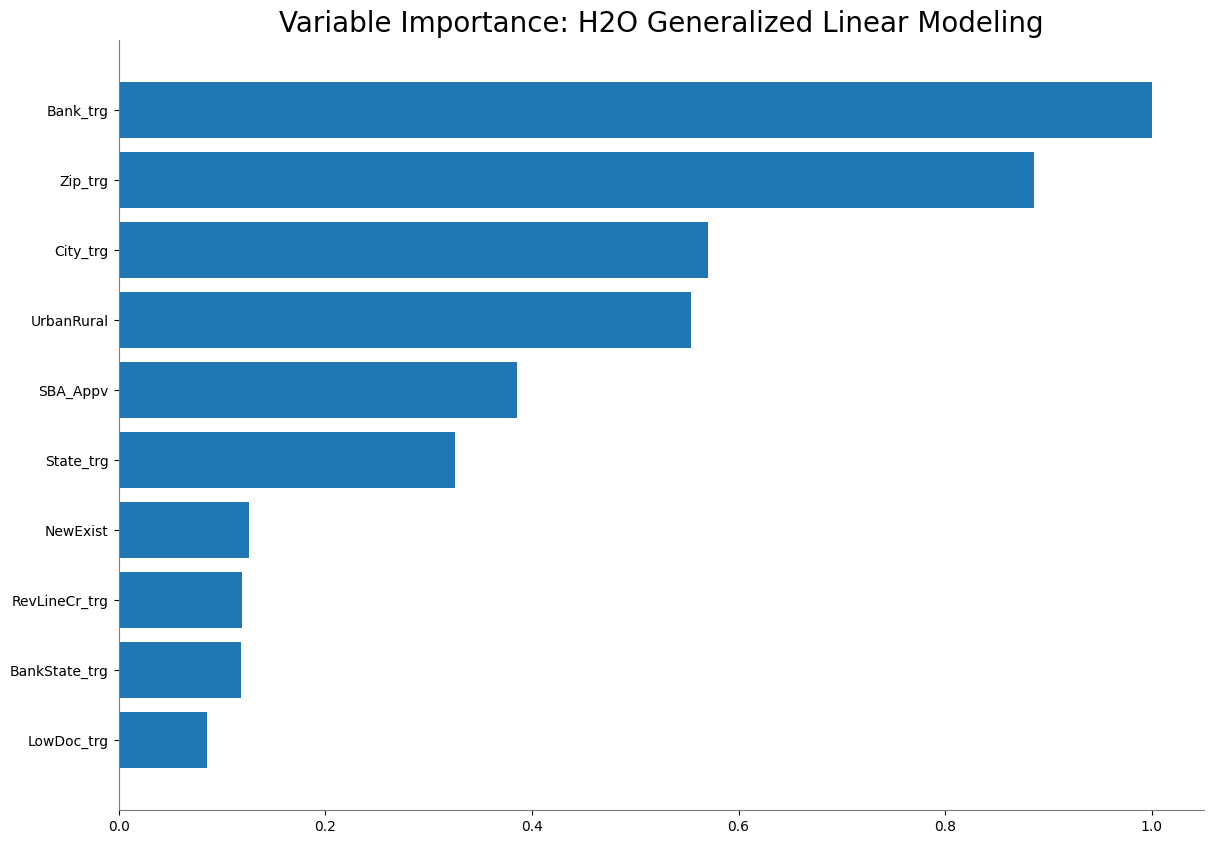

<Figure size 640x480 with 0 Axes>

In [100]:
glm_binom_v1.varimp_plot()

In [99]:
glm_binom_v1.predict(test_te)

glm prediction progress: |

███████████████████████████████████████████████████████| (done) 100%


predict,p0,p1
0,0.936866,0.0631339
0,0.892328,0.107672
0,0.910948,0.0890522
0,0.898462,0.101538
0,0.797991,0.202009
0,0.978571,0.0214295
0,0.97722,0.0227796
0,0.807746,0.192254
1,0.380285,0.619715
0,0.923419,0.0765811


# Feature extraction

we can improve its predictive capacity. We'll do a combination of binning (by converting several numeric fields to categorical) and interaction variables

In [116]:
train_te.describe()

Rows:474537
Cols:20

,City_trg,State_trg,Zip_trg,Bank_trg,BankState_trg,RevLineCr_trg,LowDoc_trg,index,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status
type,real,real,real,real,real,real,real,int,int,int,int,int,int,int,int,int,int,int,int,enum
mins,0.050250119367146476,0.05378190361767601,0.06035538515099934,-0.014823829423143397,0.0364146736947475,0.005640814144486292,0.0757603055693507,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200.0,100.0,
mean,0.17122785690918718,0.17002790025736367,0.16997025504804622,0.17786347875335332,0.17006039529938144,0.17003231884667125,0.17003200304891508,404422.7399170138,396568.1153292578,11.42516389659816,1.281088724377657,8.660351036905448,11.002457131899094,2787.471153987991,0.7518655025846238,203078.02506443136,5.024807338521549,195041.55395891154,151669.76895584536,
maxs,0.5961687120121717,0.27320350506365837,0.5950282970191646,0.7500016309323115,0.39503970722759324,0.26818237944165724,0.19646223190933038,809246.0,928120.0,9999.0,2.0,8800.0,8800.0,99999.0,2.0,11446325.0,996262.0,5000000.0,5000000.0,
sigma,0.06256874932894671,0.04067078265752939,0.06193998100036642,0.11287012761429108,0.07095655305557438,0.04676942874365501,0.03131151200894823,233555.75581549632,264359.56648609537,72.17700511416847,0.45222330083931095,240.8391863161609,241.05158981485943,12838.182180485299,0.6491304741391511,288624.88181677787,1971.6433976029557,284560.5303583031,230040.42890459258,
zeros,0,0,0,0,0,0,0,0,108556,3400,576,333035,235957,107883,173461,100,474531,0,0,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.1269873580269154,0.12071165346538923,0.13944230254355583,0.2720282910214418,0.21905467926204408,0.1420542693631385,0.17864290658145712,1.0,722410.0,20.0,1.0,0.0,0.0,1.0,0.0,137000.0,0.0,137000.0,109737.0,0
1,0.17466434076794354,0.1514526228355938,0.18494444954974698,0.1696889359187519,0.15412173091678047,0.14305760150120003,0.0889439779974818,4.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,52500.0,0.0,52500.0,42000.0,0
2,0.14324606573690019,0.16740034475755117,0.15443920201046177,0.04924806155129522,0.1639812755515995,0.15291714613601906,0.18950578335433768,5.0,234110.0,5.0,1.0,2.0,0.0,1.0,0.0,52000.0,0.0,52000.0,52000.0,0


In [104]:
import numpy as np
column_to_bin = col = "Elevation"
col_np_array = np.array(train[column_to_bin].as_data_frame(use_pandas=True)[column_to_bin].values, dtype=np.int64) # Convert single column to numpy array

counts, breaks = np.histogram(col_np_array, bins=5)

['1', 'A', 'C', 'N', 'R', 'S', 'Unknown', 'Y']

## Model Tuning

You should tune two types of models: one Sklearn and one H2O-3. Perform tuning for the selected model type from the set of Linear models available in Sklearn and H2O-3:
- Hyper-parameter tuning. Your hyper-parameter search space should have at least 50 combinations.
- To avoid overfitting and provide you with reasonable estimate of model performance on hold-out dataset, you will need to split your dataset as following:
    - Train, will be used to train model
    - Validation, will be used to validate model each round of training
    - Testing, will be used to provide final performance metrics, used only once on the final model
- Feature engineering. See project description

**Select final model that produces best performance on the Test dataset.**
- For the best model, calculate probability threshold to maximize F1. 

## Save all artifacts

Save all artifacts needed for scoring function:
- Trained model
- Encoders
- Any other arficats you will need for scoring

**You should stop your notebook here. Scoring function should be in a separate file/notebook.**

## Project Summary and Conclusion

Provide your summary and conclusion. The summary should include:
- Summary of your work
- Summary of your findings
- Summary of your model performance
- Summary of your recommendations

## Stop Here. Create new file/notebook

Don't include scoring function in the same notebook as your project. Create a new notebook or python file for scoring function.

### Model Scoring

Write function that will load artifacts from above, transform and score on a new dataset.
Your function should return Python list of labels. For example: [0,1,0,1,1,0,0]


In [1]:
def project_1_scoring(data):
    """
    Function to score input dataset.
    
    Input: dataset in Pandas DataFrame format
    Output: Python list of labels in the same order as input records
    
    Flow:
        - Load artifacts
        - Transform dataset
        - Score dataset
        - Return pandas DF with following columns:
            - index
            - label
            - probability_0
            - probability_1
    """
    pass

### Example of Scoring function

Don't copy the code as is. It is provided as an example only. 
- Function `train_model` - you need to focus on model and artifacts saving:
    ```
    pickle.dump(obj=artifacts_dict, file=artifacts_dict_file)
    ```
- Function `project_1_scoring` - you should have similar function with name `project_1_scoring`. The function will:
    - Get Pandas dataframe as parameter
    - Will load model and all needed encoders
    - Will perform needed manipulations on the input Pandas DF - in the exact same format as input file for the project, minus MIS_Status feature
    - Return Pandas DataFrame
        - record index
        - predicted class for threshold maximizing F1
        - probability for class 0 (PIF)
        - probability for class 1 (CHGOFF)


Don't copy the below cell code in any way!!! The code is provided as an example only.  
- The code is provided as an example of generating artifacts for scoring function
- Your scoring function code should not have model training part!!!!

In [2]:
"""
Don't copy of use the cell code in any way!!!
The code is provided as an example of generating artifacts for scoring function
Your scoring function code should not have model training part!!!!
"""
import pandas as pd
import numpy as np
def train_model(data):
    """
    Train sample model and save artifacts
    """
    from sklearn.preprocessing import OneHotEncoder
    from copy import deepcopy
    from sklearn.linear_model import LogisticRegression
    import pickle
    from sklearn.impute import SimpleImputer
    
    target_col = "Survived"
    cols_to_drop = ['Name', 'Ticket', 'Cabin','SibSp', 'Parch', 'Sex','Embarked','PassengerId','Survived']
    y = data[target_col]
    X = data.drop(columns=[target_col])
    
    # Impute Embarked
    X['Embarked'].replace(np.NaN, 'S',inplace = True)
    
    # Create new feature
    X['FamilySize'] = X['SibSp'] + X['Parch']
    
    # Mean impute Age
    imp_age_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
    imp_age_mean.fit(X[['Age']])
    X['Age'] = imp_age_mean.transform(X[['Age']])


    ohe_orig_columns = ["Embarked","Sex"]
    cat_encoders = {}
    for col in ohe_orig_columns:
        enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
        enc.fit(X[[col]])
        result = enc.transform(X[[col]])
        ohe_columns = [col+"_"+str(x) for x in enc.categories_[0]]
        result_train = pd.DataFrame(result, columns=ohe_columns)
        X= pd.concat([X, result_train], axis=1)
        cat_encoders[col] = [deepcopy(enc),"ohe"]
        
    clf = LogisticRegression(max_iter=1000, random_state=0)
    
    columns_to_train = [x for x in X.columns if x not in cols_to_drop]
    print("Training on following columns:", columns_to_train)
    clf.fit(X[columns_to_train], y)
    
    # Todo: Add code to calculate optimal threshold. Replace 0.5 !!!!!
    threshold = 0.5
    # End Todo
    
    artifacts_dict = {
        "model": clf,
        "cat_encoders": cat_encoders,
        "imp_age_mean": imp_age_mean,
        "ohe_columns": ohe_orig_columns,
        "columns_to_train":columns_to_train,
        "threshold": threshold
    }
    artifacts_dict_file = open("./artifacts/artifacts_dict_file.pkl", "wb")
    pickle.dump(obj=artifacts_dict, file=artifacts_dict_file)
    
    artifacts_dict_file.close()    
    return clf

In [3]:
from sklearn.model_selection import train_test_split
df = pd.read_csv('titanic.csv')
target_col = "Survived"
y = df[target_col]
X = df.drop(columns=[target_col])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=142)

# Reset index to avoid bug with OHE encoder due to index mismatch
X_train.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)


df_train = X_train.copy()
df_train[target_col] = y_train
train_model(df_train)

Training on following columns: ['Pclass', 'Age', 'Fare', 'FamilySize', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_female', 'Sex_male']


LogisticRegression(max_iter=1000, random_state=0)

### Example scoring function

This is example only. Don't copy the code as is!!!   
You must place scoring function in a separate Python file or Jupyter notebook.   

**Don't place function in the same notebook as rest of the code**

In [4]:
def project_1_scoring(data):
    """
    Function to score input dataset.
    
    Input: dataset in Pandas DataFrame format
    Output: Python list of labels in the same order as input records
    
    Flow:
        - Load artifacts
        - Transform dataset
        - Score dataset
        - Return labels
    
    """
    from sklearn.preprocessing import OneHotEncoder
    from copy import deepcopy
    from sklearn.linear_model import LogisticRegression
    import pickle
    
    X = data.copy()
    
    '''Load Artifacts'''
    artifacts_dict_file = open("./artifacts/artifacts_dict_file.pkl", "rb")
    artifacts_dict = pickle.load(file=artifacts_dict_file)
    artifacts_dict_file.close()
    
    clf = artifacts_dict["model"]
    cat_encoders = artifacts_dict["cat_encoders"]
    imp_age_mean = artifacts_dict["imp_age_mean"]
    ohe_columns = artifacts_dict["ohe_columns"]
    columns_to_score = artifacts_dict["columns_to_train"]
    threshold = artifacts_dict["threshold"]
    
    # Impute Embarked
    X['Embarked'].replace(np.NaN, 'S',inplace = True)
    
    # Create new feature
    X['FamilySize'] = X['SibSp'] + X['Parch']
    
    # Mean impute Age
    X['Age'] = imp_age_mean.transform(X[['Age']])
    
    '''Encode categorical columns'''
    for col in ohe_columns:
        enc = cat_encoders[col][0]
        result = enc.transform(X[[col]])
        ohe_columns = [col+"_"+str(x) for x in enc.categories_[0]]
        result_train = pd.DataFrame(result, columns=ohe_columns)
        X = pd.concat([X, result_train], axis=1)
        
    y_pred_proba = clf.predict_proba(X[columns_to_score])
    y_pred = (y_pred_proba[:,0] < threshold).astype(np.int16)
    d = {"index":data["PassengerId"],
         "label":y_pred,
         "probability_0":y_pred_proba[:,0],
         "probability_1":y_pred_proba[:,1]}
    
    return pd.DataFrame(d)

In [5]:
project_1_scoring(X_test).head()

,index,label,probability_0,probability_1
0,118,0,0.795493,0.204507
1,302,0,0.913022,0.086978
2,285,0,0.538932,0.461068
3,477,0,0.823059,0.176941
4,109,0,0.922561,0.077439
